In [3]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\Henry\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
#Code from 12 Trending skills.


df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [5]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0) 
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


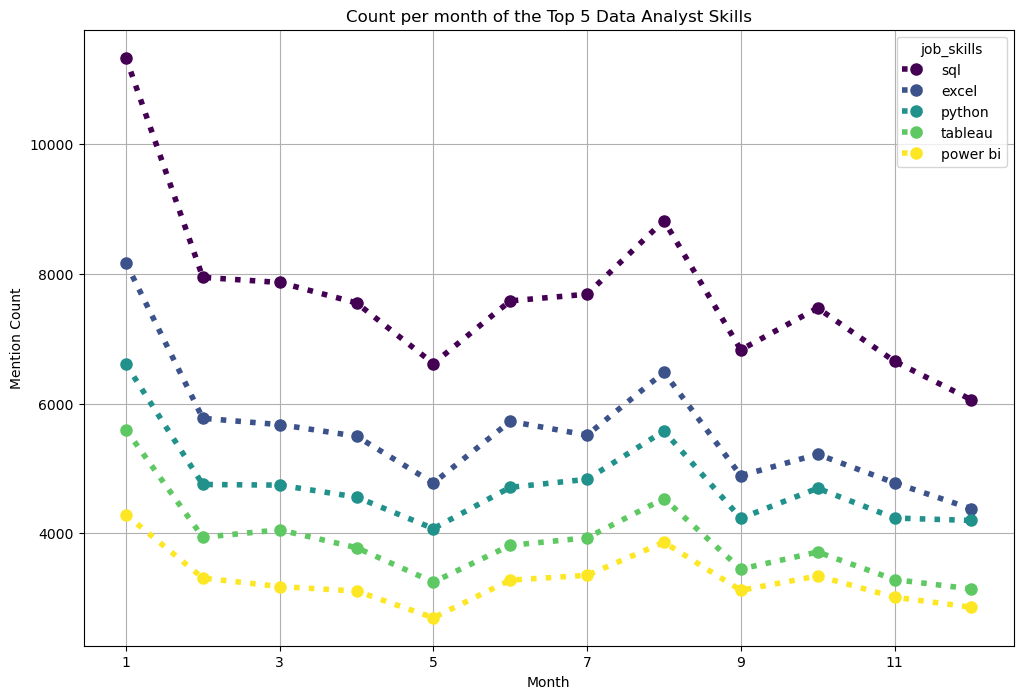

In [6]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=4,
    linestyle=':', # options: '-', '--' '-.', ':'
     colormap='viridis', #loads of options
     marker='o', #loads of options like '*' etc
     markersize=8,
     figsize=(12,8),
     grid=True
    )
#look at all the parameters you can add to matplot lib.
plt.title('Count per month of the Top 5 Data Analyst Skills')
plt.ylabel('Mention Count')
plt.xlabel('Month')
plt.show()

In [7]:
#Using the scatter plot from Lesson 15. But have used top 20 skills instead of top 10 to get some overlap to work with

df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [8]:
df_explode = df_DA.explode('job_skills')


df_skill_stats = df_explode.groupby('job_skills').agg(
                        skill_count=('job_skills', 'count'),
                        median_salary=('salary_year_avg', 'median')
                ) # using a dictonary to find key values to define how to do our aggregation

df_skill_stats = df_skill_stats.sort_values(by='skill_count', ascending=False).head(20)

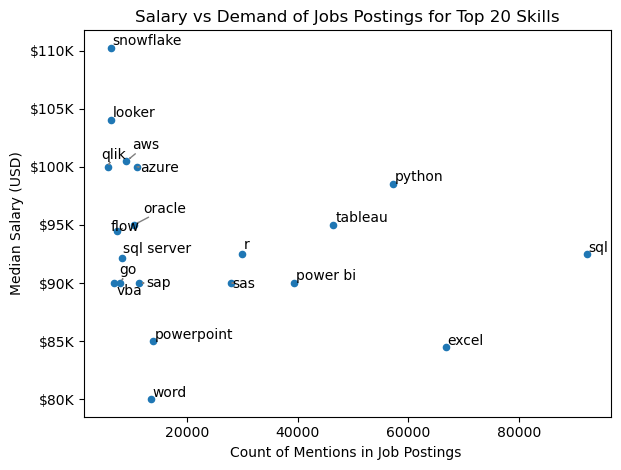

In [17]:
df_skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Mentions in Job Postings ')
plt.ylabel('Median Salary (USD)')
plt.title('Salary vs Demand of Jobs Postings for Top 20 Skills')
plt.tight_layout()


texts = []
# Use a loop function to iterate through the .head(10) df to give us the location of each point on the graph.
for i, txt in enumerate(df_skill_stats.index):
    texts.append(plt.text(df_skill_stats['skill_count'].iloc[i], df_skill_stats['median_salary'].iloc[i], txt))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray', lw=1))


plt.show()

In [10]:
from adjustText import adjust_text

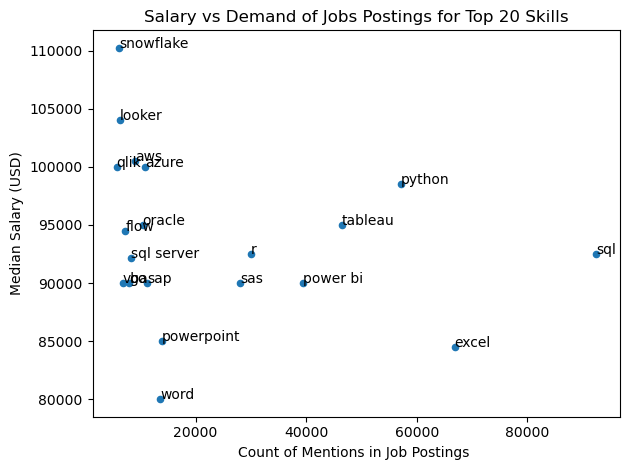

In [24]:
df_skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of Mentions in Job Postings ')
plt.ylabel('Median Salary (USD)')
plt.title('Salary vs Demand of Jobs Postings for Top 20 Skills')
plt.tight_layout()

# Use a loop function to iterate through the .head(10) df to give us the location of each point on the graph.
for i, txt in enumerate(df_skill_stats.index):
    plt.text(df_skill_stats['skill_count'].iloc[i], df_skill_stats['median_salary'].iloc[i], txt)